In [1]:
import pandas as pd
import numpy as np
import scipy.stats.stats
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats.stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import itertools
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_excel('C:/Users/ravit/Downloads/car prediction.xlsx')

In [3]:
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data2=data.drop(['Column7'],axis=1)

In [5]:
label_encoder = {}
columns_to_encode = ['Column1', 'Column2', 'Column3','Column4','Column5','Column6']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for col in columns_to_encode:
    data2[col] = label_encoder.fit_transform(data2[col])

print(data2)

      Column1  Column2  Column3  Column4  Column5  Column6
0           3        3        0        0        2        1
1           3        3        0        0        2        2
2           3        3        0        0        2        0
3           3        3        0        0        1        1
4           3        3        0        0        1        2
...       ...      ...      ...      ...      ...      ...
1723        1        1        3        2        1        2
1724        1        1        3        2        1        0
1725        1        1        3        2        0        1
1726        1        1        3        2        0        2
1727        1        1        3        2        0        0

[1728 rows x 6 columns]


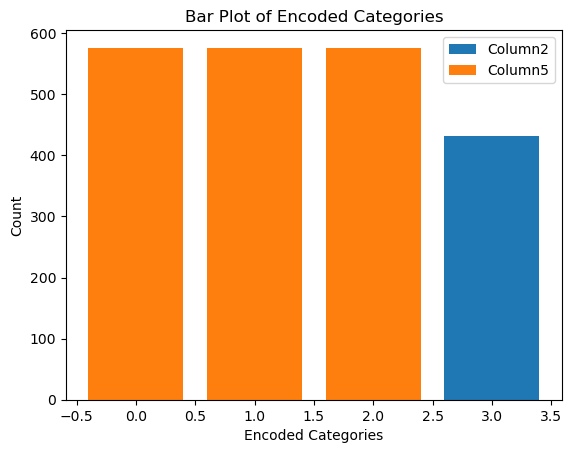

In [102]:
# Visualization for categorical columns (e.g., Column2 and Column5)
plt.bar(data2['Column2'].value_counts().index, data2['Column2'].value_counts().values, label='Column2')
plt.bar(data2['Column5'].value_counts().index, data2['Column5'].value_counts().values, label='Column5')
plt.xlabel('Encoded Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Encoded Categories')
plt.legend()
plt.show()


In [60]:
from sklearn. preprocessing import LabelEncoder 
le = LabelEncoder()
data['Code_le'] = le.fit_transform(data.Column7)
data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Code_le
0,vhigh,vhigh,2,2,small,low,unacc,2
1,vhigh,vhigh,2,2,small,med,unacc,2
2,vhigh,vhigh,2,2,small,high,unacc,2
3,vhigh,vhigh,2,2,med,low,unacc,2
4,vhigh,vhigh,2,2,med,med,unacc,2


In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn. preprocessing import LabelEncoder 
le = LabelEncoder()
data['Code_le'] = le.fit_transform(data.Column7)
data.head()

# Load your dataset into a pandas DataFrame
# Load the Iris dataset
X = data2 # Replace 'target_column' with the name of your target column

y= data[['Code_le']].values

# Define the columns that need to be one-hot encoded
categorical_features = ['Column1','Column2','Column3','Column5','Column4','Column6']  # Replace with your categorical column names

# Create the ColumnTransformer for one-hot encoding features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'  # Leave the other features unchanged
)

# Create the pipeline with the ColumnTransformer and LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs'))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                            , random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




Accuracy: 0.92


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


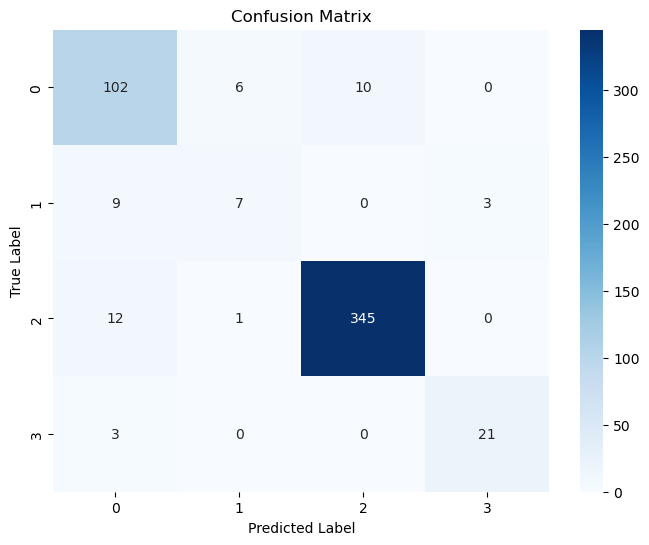

In [119]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [97]:
num_classes = len(np.unique(y_test))

print(f"Number of classes in y_test: {num_classes}")

Number of classes in y_test: 4


In [120]:
unique_classes, class_counts = np.unique(y_test, return_counts=True)

# Print the data count for each class in y_test
print("Data count for each class in y_test:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class '{cls}': {count}")

Data count for each class in y_test:
Class '0': 118
Class '1': 19
Class '2': 358
Class '3': 24


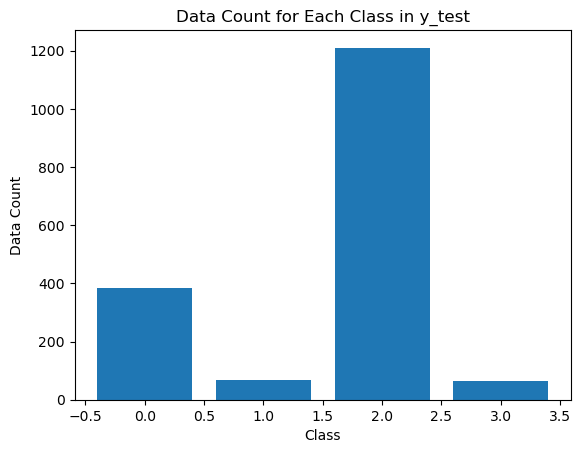

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have computed unique_classes and class_counts correctly
# unique_classes: Array containing the unique classes
# class_counts: Array containing the count of occurrences for each class

# Create the bar plot
plt.bar(unique_classes, class_counts)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Data Count')
plt.title('Data Count for Each Class in y_test')

# Show the plot
plt.show()


In [77]:
# Access the fitted logistic regression model
logistic_model = pipeline.named_steps['classifier']

# Get the intercepts (biases) for each class
intercepts = logistic_model.intercept_

print("Intercepts (Biases) for Each Class:")
for class_idx, intercept in enumerate(intercepts):
    print(f"Class {class_idx}: {intercept:.4f}")

Intercepts (Biases) for Each Class:
Class 0: 1.3608
Class 1: -2.6470
Class 2: 5.8415
Class 3: -4.5553


In [78]:
# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(pipeline, X, y, cv=5)  # Change cv value as desired (5-fold cross-validation here)

# Print the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:")
for fold_idx, score in enumerate(cv_scores, 1):
    print(f"Fold {fold_idx}: {score:.4f}")

# Calculate and print the mean accuracy and standard deviation of the accuracy scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-Validation Accuracy Scores:
Fold 1: 0.7023
Fold 2: 0.8497
Fold 3: 0.7457
Fold 4: 0.7565
Fold 5: 0.7623
Mean Accuracy: 0.7633
Standard Deviation of Accuracy: 0.0481


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


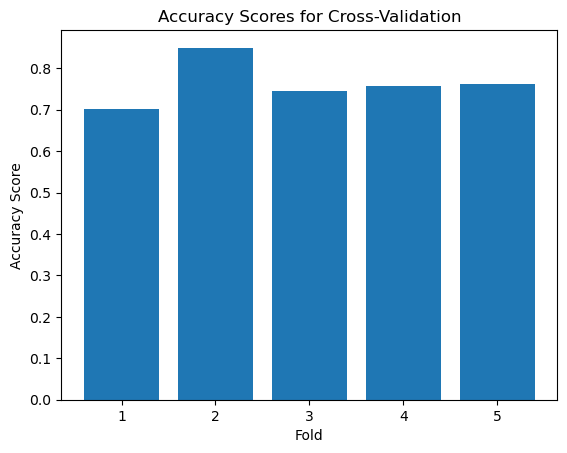

In [79]:
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Cross-Validation')
plt.show()

C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

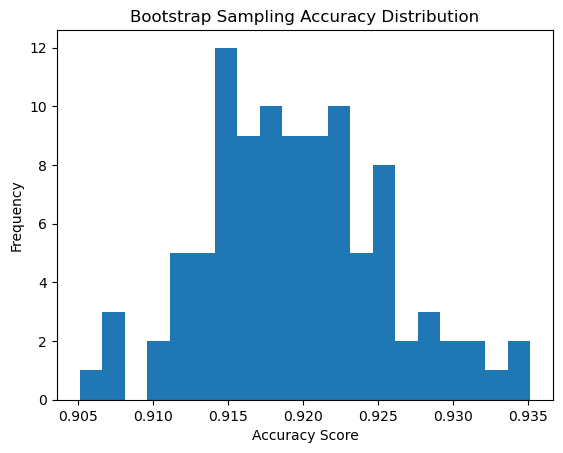

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

accuracy_scores = []

# Perform bootstrap sampling and get accuracy scores
num_bootstraps = 100  # Change the number of bootstraps as desired
for _ in range(num_bootstraps):
    X_boot, y_boot = resample(X, y)
    cv_scores = cross_val_score(pipeline, X_boot, y_boot, cv=5)
    accuracy_scores.append(cv_scores.mean())

# Plot the accuracy scores as a histogram
plt.hist(accuracy_scores, bins=20)
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.title('Bootstrap Sampling Accuracy Distribution')
plt.show()

In [121]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X = data.drop('Column7', axis=1)  # Replace 'target_column' with the name of your target column

y= data[['Code_le']].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the indices of the categorical columns that need one-hot encoding
categorical_columns = [0,1,2,4,5,3]  # dth (cm)'

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create the decision tree classifier
clf = DecisionTreeClassifier(max_depth=10)

# Create a pipeline that includes the one-hot encoding preprocessor and the decision tree classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 100.00%


In [107]:
from sklearn.model_selection import GridSearchCV

# Define a range of max_depth values to search
param_grid = {'classifier__max_depth': [3, 5, 10, 20]}  # None means no limit on depth

# Create GridSearchCV to find the best max_depth using cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator (model) from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy: {:.2f}%".format(accuracy * 100))
print("Best Parameters:", grid_search.best_params_)


Best Accuracy: 100.00%
Best Parameters: {'classifier__max_depth': 3}


In [108]:
clf = DecisionTreeClassifier(max_depth=20, ccp_alpha=0.1)  # Experiment with different values


In [111]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=20)  # Experiment with different values


In [123]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X = data2[['Column1','Column4','Column3','Column6','Column5','Column2']].values
y= data[['Code_le']].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the indices of the categorical columns that need one-hot encoding
categorical_columns = [0,1,2,3,4,5]   # In this example, there are no categorical columns in the Iris dataset

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

# Create a pipeline that includes the one-hot encoding preprocessor and the Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Accuracy: 94.99%


In [124]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[108   6   2   2]
 [  4  14   0   1]
 [  6   0 352   0]
 [  4   1   0  19]]


Accuracy before pruning: 0.97
Accuracy after pruning: 0.97


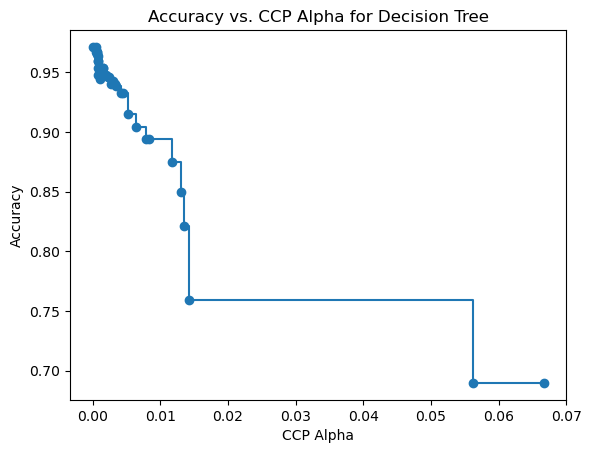

In [128]:
_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Split the dataset into training and testing sets


# Create the decision tree classifier with the default settings
clf = DecisionTreeClassifier(random_state=42)

# Fit the decision tree on the training data
clf.fit(X_train, y_train)

# Evaluate the accuracy on the test set
accuracy_before_pruning = clf.score(X_test, y_test)
print(f"Accuracy before pruning: {accuracy_before_pruning:.2f}")

# Pruning: Cost-Complexity Pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a list of pruned classifiers for different ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Find the index of the highest accuracy in the validation set
max_accuracy_idx = np.argmax([clf.score(X_test, y_test) for clf in clfs])

# Select the best pruned classifier
best_clf = clfs[max_accuracy_idx]

# Evaluate the accuracy of the pruned decision tree on the test set
accuracy_after_pruning = best_clf.score(X_test, y_test)
print(f"Accuracy after pruning: {accuracy_after_pruning:.2f}")

# Plot the accuracy vs. alpha curve
plt.figure()
plt.plot(ccp_alphas, [clf.score(X_test, y_test) for clf in clfs], marker='o', drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. CCP Alpha for Decision Tree")
plt.show()



In [133]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the GradientBoostingClassifier
boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the GradientBoostingClassifier on the training data
boosting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boosting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.98


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

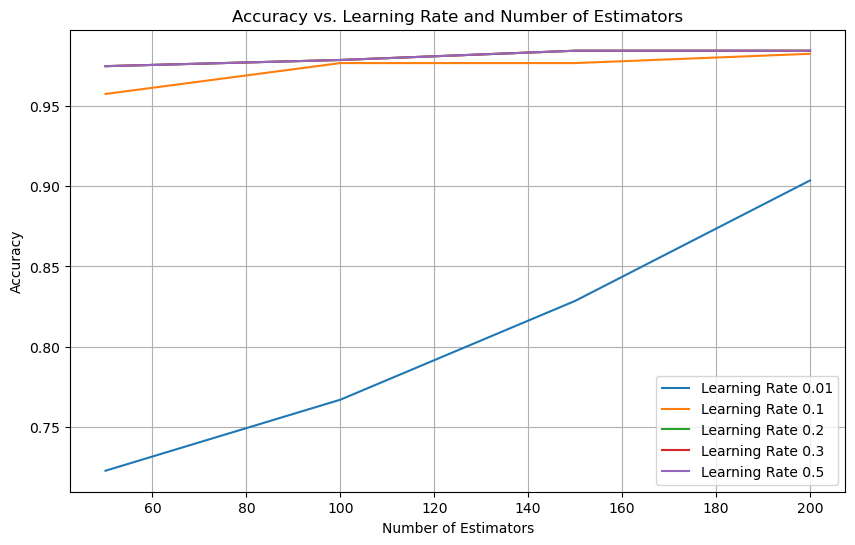

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have X_train, X_test, y_train, y_test from the previous code

# Define a range of learning rates and number of estimators to try
learning_rates = [0.01, 0.1, 0.2, 0.3]
n_estimators_list = [50, 100, 150, 200]

# Initialize empty lists to store accuracy results
accuracy_results = []

# Loop over different learning rates and number of estimators
for lr in learning_rates:
    for n_estimators in n_estimators_list:
        # Create the GradientBoostingClassifier with current hyperparameters
        boosting_clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr, random_state=42)
        
        # Fit the model on the training data
        boosting_clf.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = boosting_clf.predict(X_test)
        
        # Calculate accuracy and store the result
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results.append((lr, n_estimators, accuracy))

# Convert the results to a NumPy array for easier manipulation
accuracy_results = np.array(accuracy_results)

# Separate the results for each learning rate
learning_rate_01 = accuracy_results[accuracy_results[:, 0] == 0.01]
learning_rate_1 = accuracy_results[accuracy_results[:, 0] == 0.1]
learning_rate_2 = accuracy_results[accuracy_results[:, 0] == 0.2]
learning_rate_3 = accuracy_results[accuracy_results[:, 0] == 0.3]
learning_rate_3 = accuracy_results[accuracy_results[:, 0] == 0.]

# Visualize the accuracy for each learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_01[:, 1], learning_rate_01[:, 2], label='Learning Rate 0.01')
plt.plot(learning_rate_1[:, 1], learning_rate_1[:, 2], label='Learning Rate 0.1')
plt.plot(learning_rate_2[:, 1], learning_rate_2[:, 2], label='Learning Rate 0.2')
plt.plot(learning_rate_2[:, 1], learning_rate_2[:, 2], label='Learning Rate 0.3')
plt.plot(learning_rate_2[:, 1], learning_rate_2[:, 2], label='Learning Rate 0.5')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate and Number of Estimators')
plt.legend()
plt.grid()
plt.show()


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

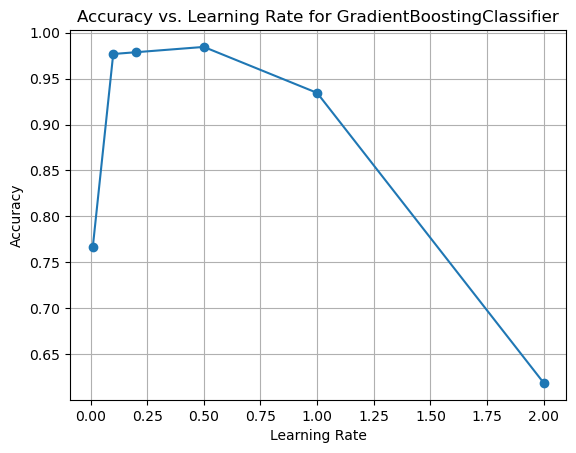

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you already have X_train, X_test, y_train, y_test from the previous code

learning_rates = [0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
accuracy_scores = []

for lr in learning_rates:
    # Create the GradientBoostingClassifier with the current learning rate
    boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    
    # Fit the model on the training data
    boosting_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = boosting_clf.predict(X_test)
    
    # Calculate accuracy and store the result
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different learning rates
plt.plot(learning_rates, accuracy_scores, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate for GradientBoostingClassifier')
plt.grid()
plt.show()


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

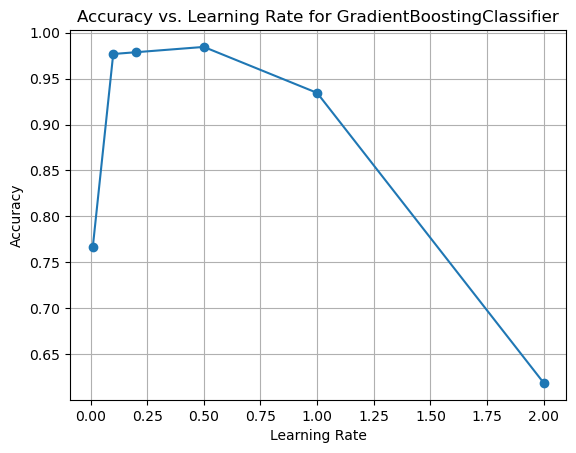

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you already have X_train, X_test, y_train, y_test from the previous code

learning_rates = [0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
accuracy_scores = []

for lr in learning_rates:
    # Create the GradientBoostingClassifier with the current learning rate
    boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    
    # Fit the model on the training data
    boosting_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = boosting_clf.predict(X_test)
    
    # Calculate accuracy and store the result
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different learning rates
plt.plot(learning_rates, accuracy_scores, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate for GradientBoostingClassifier')
plt.grid()
plt.show()


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

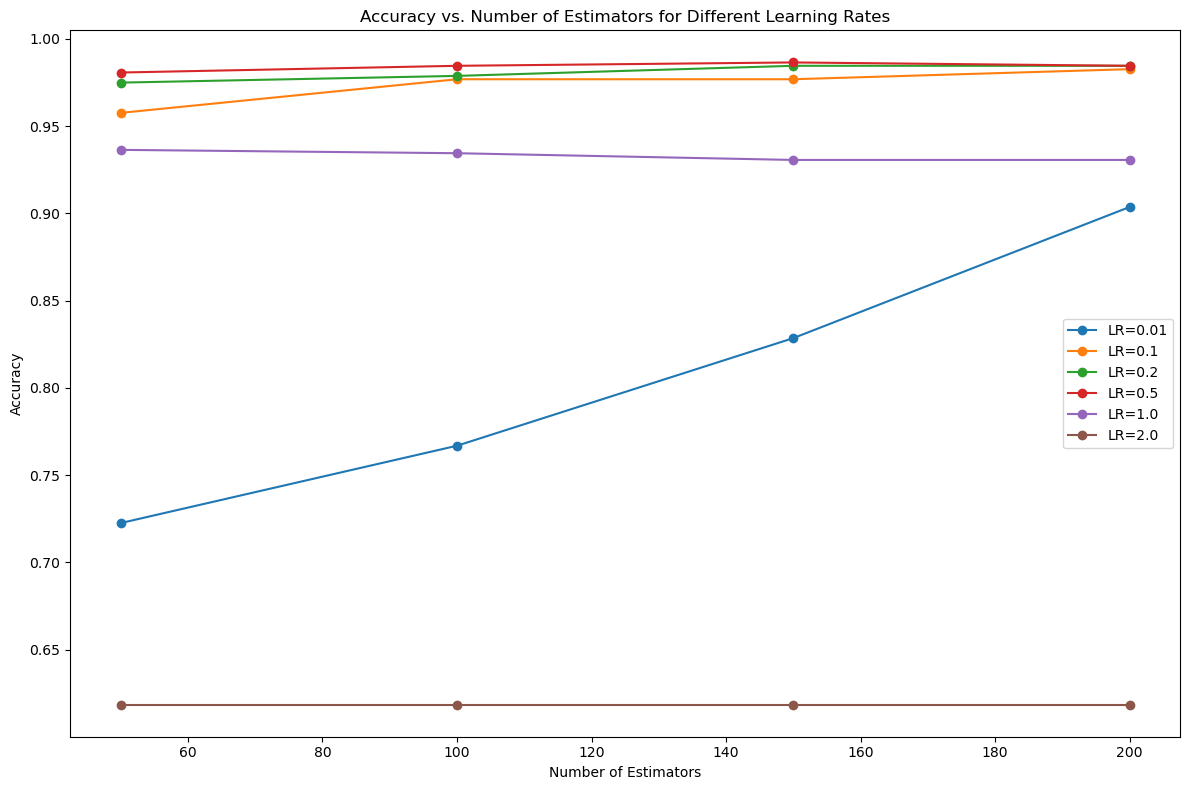

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you already have X_train, X_test, y_train, y_test from the previous code

learning_rates = [0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
n_estimators_list = [50, 100, 150, 200]
accuracy_results = np.zeros((len(learning_rates), len(n_estimators_list)))

for i, lr in enumerate(learning_rates):
    for j, n_estimators in enumerate(n_estimators_list):
        # Create the GradientBoostingClassifier with the current learning rate and number of estimators
        boosting_clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr, random_state=42)
        
        # Fit the model on the training data
        boosting_clf.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = boosting_clf.predict(X_test)
        
        # Calculate accuracy and store the result
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[i, j] = accuracy

# Create a grid plot to visualize the accuracy scores for different learning rates and number of estimators
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(n_estimators_list, accuracy_results[i], marker='o', label=f'LR={lr}')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Number of Estimators for Different Learning Rates')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In [145]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier as the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Fit the BaggingClassifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataC

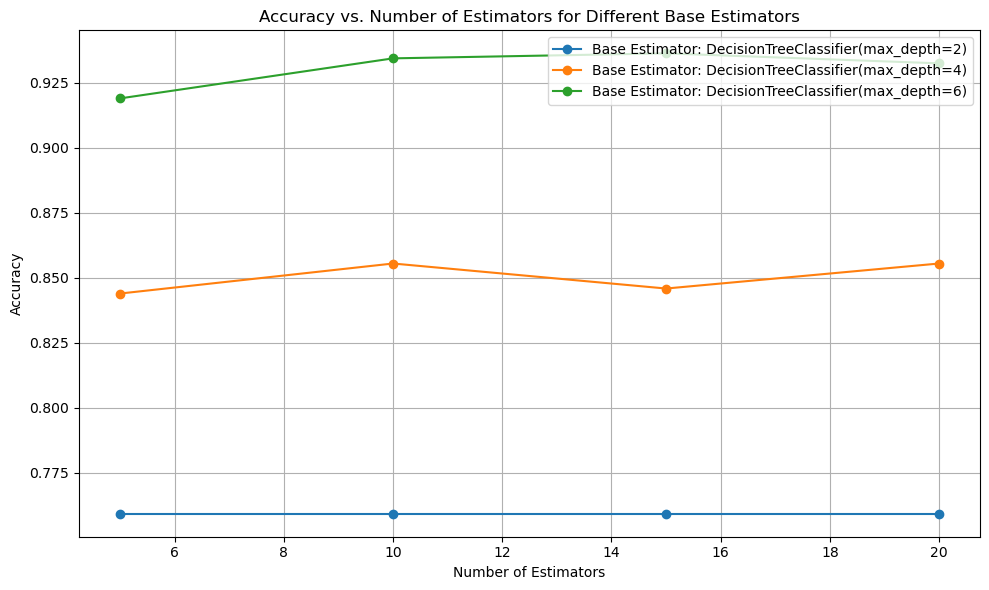

In [146]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of base estimator options to try
base_estimators = [DecisionTreeClassifier(max_depth=2),
                   DecisionTreeClassifier(max_depth=4),
                   DecisionTreeClassifier(max_depth=6)]

# Define a list of n_estimators values to try
n_estimators_list = [5, 10, 15, 20]

# Dictionary to store the accuracy results for different combinations
accuracy_results = {}

# Iterate through different combinations of base estimators and n_estimators
for base_estimator in base_estimators:
    for n_estimators in n_estimators_list:
        # Create the BaggingClassifier with the current base_estimator and n_estimators
        bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)
        
        # Fit the model on the training data
        bagging_clf.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = bagging_clf.predict(X_test)
        
        # Calculate accuracy and store the result
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[(str(base_estimator), n_estimators)] = accuracy

# Plot the accuracy scores for different combinations
plt.figure(figsize=(10, 6))
for base_estimator in base_estimators:
    accuracies = [accuracy_results[(str(base_estimator), n_estimators)] for n_estimators in n_estimators_list]
    plt.plot(n_estimators_list, accuracies, marker='o', label=f'Base Estimator: {str(base_estimator)}')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators for Different Base Estimators')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X = data2[['Column1','Column4','Column3','Column6','Column5','Column2']].values
y = data[['Code_le']].values

# Define the indices of the categorical columns that need one-hot encoding
categorical_columns = [0, 1, 2, 3, 4, 5]   # In this example, there are no categorical columns in the Iris dataset

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Create a pipeline that includes the one-hot encoding preprocessor and the Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

# Define the hyperparameter grid to search over
param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__max_depth': [10, 20, 30, 40]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X, y)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['classifier__n_estimators']
best_max_depth = grid_search.best_params_['classifier__max_depth']

print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)

# Make predictions on the test data using the best model
y_pred = grid_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

Best n_estimators: 50
Best max_depth: 20
Accuracy: 100.00%


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

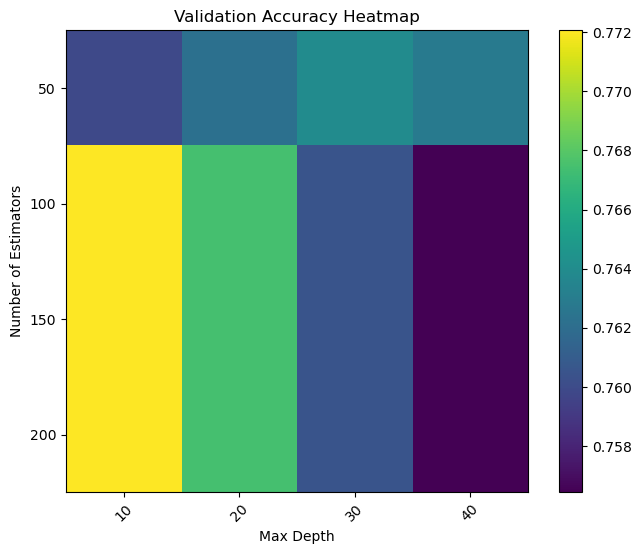

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X = data2[['Column1','Column4','Column3','Column6','Column5','Column2']].values
y = data[['Code_le']].values

# Define the indices of the categorical columns that need one-hot encoding
categorical_columns = [0, 1, 2, 3, 4, 5]   # In this example, there are no categorical columns in the Iris dataset

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Create a pipeline that includes the one-hot encoding preprocessor and the Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

# Define the hyperparameter grid to search over
param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__max_depth': [10, 20, 30, 40]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X, y)

# Get the results of the grid search
results = grid_search.cv_results_
n_estimators_values = param_grid['classifier__n_estimators']
max_depth_values = param_grid['classifier__max_depth']
mean_test_scores = results['mean_test_score']

# Reshape the test scores to a 2D array for heatmap plotting
mean_test_scores = np.array(mean_test_scores).reshape(len(n_estimators_values), len(max_depth_values))

# Plot the validation accuracy as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(mean_test_scores, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(max_depth_values)), max_depth_values, rotation=45)
plt.yticks(np.arange(len(n_estimators_values)), n_estimators_values)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Validation Accuracy Heatmap')
plt.show()


In [152]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X = data2[['Column1','Column4','Column3','Column6','Column5','Column2']].values
y = data[['Code_le']].values.ravel()  # Convert y to a 1D array using ravel()

# Define the indices of the categorical columns that need one-hot encoding
categorical_columns = [0, 1, 2, 3, 4, 5]   # In this example, there are no categorical columns in the Iris dataset

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Create a pipeline that includes the one-hot encoding preprocessor and the Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

# Define the hyperparameter grid to search over
param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__max_depth': [10, 20, 30, 40]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X, y)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['classifier__n_estimators']
best_max_depth = grid_search.best_params_['classifier__max_depth']

print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)

# Make predictions on the test data using the best model
y_pred = grid_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))



Best n_estimators: 50
Best max_depth: 20
Accuracy: 100.00%


C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ravit\anaconda3\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

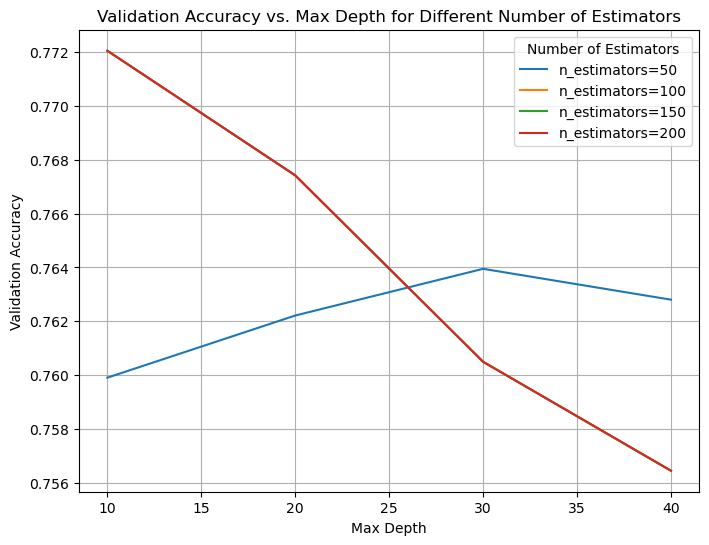

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X = data2[['Column1','Column4','Column3','Column6','Column5','Column2']].values
y = data[['Code_le']].values

# Define the indices of the categorical columns that need one-hot encoding
categorical_columns = [0, 1, 2, 3, 4, 5]   # In this example, there are no categorical columns in the Iris dataset

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Create a pipeline that includes the one-hot encoding preprocessor and the Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

# Define the hyperparameter grid to search over
param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__max_depth': [10, 20, 30, 40]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X, y)

# Get the results of the grid search
results = grid_search.cv_results_
n_estimators_values = param_grid['classifier__n_estimators']
max_depth_values = param_grid['classifier__max_depth']
mean_test_scores = results['mean_test_score']

# Reshape the test scores to a 2D array for heatmap plotting
mean_test_scores = np.array(mean_test_scores).reshape(len(n_estimators_values), len(max_depth_values))

# Plot the validation accuracy as a line graph for each value of n_estimators
plt.figure(figsize=(8, 6))
for i, n_estimators in enumerate(n_estimators_values):
    plt.plot(max_depth_values, mean_test_scores[i, :], label=f'n_estimators={n_estimators}')
plt.xlabel('Max Depth')
plt.ylabel('Validation Accuracy')
plt.legend(title='Number of Estimators', loc='best')
plt.title('Validation Accuracy vs. Max Depth for Different Number of Estimators')
plt.grid()
plt.show()


In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X = data2[['Column1','Column4','Column3','Column6','Column5','Column2']].values
y = data[['Code_le']].values.ravel()  # Convert y to a 1D array using ravel()

# Define the indices of the categorical columns that need one-hot encoding
categorical_columns = [0, 1, 2, 3, 4, 5]   # In this example, there are no categorical columns in the Iris dataset

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Create a pipeline that includes the one-hot encoding preprocessor and the Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

# Perform Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()

accuracy_scores = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy and store in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all iterations
average_accuracy = np.mean(accuracy_scores)

print("Average Accuracy: {:.2f}".format(average_accuracy * 100))


Average Accuracy: 96.59


In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X = data2[['Column1','Column4','Column3','Column6','Column5','Column2']].values
y = data[['Code_le']].values.ravel()  # Convert y to a 1D array using ravel()

# Define the indices of the categorical columns that need one-hot encoding
categorical_columns = [0, 1, 2, 3, 4, 5]   # In this example, there are no categorical columns in the Iris dataset

# Create a ColumnTransformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Create a pipeline that includes the one-hot encoding preprocessor and the Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

# Perform Bootstrapping Validation
n_splits = 100  # Number of bootstrapping iterations
test_size = 0.3  # Test set size (fraction of the data)

bootstrap = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

accuracy_scores = []
for train_index, test_index in bootstrap.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy and store in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all bootstrapping iterations
average_accuracy = np.mean(accuracy_scores)

print("Average Accuracy: {:.2f}".format(average_accuracy * 100))


Average Accuracy: 95.98
